In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Dropout, Dense, Merge, core

d:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
k = 128
base_url = "E:/Github/my_Keras_projects/test_keras/" # win
# base_url = "" # linux
ratings = pd.read_csv(base_url + "ml-1m/ratings.dat", sep='::', names=['user_id','movie_id', 'rating','timestamp'])
n_users = np.max(ratings['user_id'])
n_movies = np.max(ratings['movie_id'])
print([n_users, n_movies, len(ratings)]) # ['userId', 'movieId', 100005]  

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


[6040, 3952, 1000209]


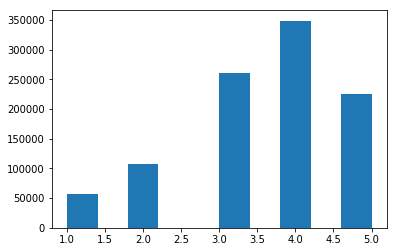

3.581564453029317


In [3]:
plt.hist(ratings['rating'])
plt.show()
print(np.mean(ratings['rating']))

In [4]:
# 第一个小网络，处理用户嵌入层
model1 = Sequential()
model1.add(Embedding(n_users + 1, k, input_length = 1))
model1.add(core.Reshape((k,)))  # keras.layers.core.Reshape

In [5]:
 # 第二个小网络，处理电影嵌入层
model2 = Sequential()
model2.add(Embedding(n_movies +1 ,k, input_length = 1 ))
model2.add(core.Reshape((k,)))


In [6]:
# 第三个小网络，在第一，二个网络基础上叠加乘积运算
model = Sequential()
model.add(Merge([model1, model2], mode = 'dot', dot_axes= 1))

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# 输出层和最后评分作对比，后向传播更新网络参数
model.compile(loss = 'mse', optimizer = 'adam') 
# 另外可以尝试 optimizer = 'rmsprop' 或 'adagrad'

In [8]:
# 获取用户索引数据和电影索引数据，相应的特征矩阵X_train需要两个索引数据一起构造
users = ratings['user_id'].values
movies = ratings['movie_id'].values
X_train = [users, movies]

In [9]:
# 评分数据
y_train = ratings['rating'].values

In [12]:
# 一切准备就绪，使用大小为100的小批量，使用50次迭代来更新权重。
model.fit(X_train, y_train, batch_size= 100, epochs= 50)
print("模型训练完成")

Epoch 1/50
1000209/1000209 [==============================] - 300s 300us/step - loss: 0.6228
Epoch 2/50
1000209/1000209 [==============================] - 293s 293us/step - loss: 0.4972
Epoch 3/50
 549800/1000209 [===============>..............] - ETA: 2:11 - loss: 0.3800

KeyboardInterrupt: 

In [ ]:
# 预测第10个用户对编号99的电影的评分
i = 10
j = 99
pred = model.predict([np.array([users[i]]), np.array([movies[j]])])

In [ ]:
# 计算训练样本误差
sum = 0 
for i in range(ratings.shape[0]):
    sum += (ratings['rating'][i] - model.predict([np.array([ratings['user_id'][i]]), np.array([ratings['movie_id'][i]])]))**2
mse = math.sqrt(sum/ratings.shape[0])
print( mse)